In [2]:
# importing required libraries
import pandas as pd

In [3]:
#loading the data
data = pd.read_csv("C:\Arun\Data/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age and Cabin have a very high number of missing values
- Embarked has very low number of missing values
## Deleting Data points with missing values

In [5]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [6]:
data_row_del=data.dropna(axis=0)
data_row_del['Age'].head(6)

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
21    34.0
Name: Age, dtype: float64

- Have deleted rows, if any one column/ feature has missing values in that row

In [7]:
data.shape, data_row_del.shape

((891, 12), (183, 12))

- Significant loss of information
- Only three columns had missing values
## Deleting columns with missing values

In [8]:
(data.isnull().sum())/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# dropping all columns with missing values
data_col_del=data.dropna(thresh = 500, axis=1)
data_col_del.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# shape before and after removing missing values

data.shape, data_col_del.shape

((891, 12), (891, 11))

- A better way to deal with missing values without loss of information?
## Replacing with a new category/value

In [12]:
data['Cabin'].fillna(value='missing')

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [13]:
data['Age'].fillna(value=999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    999.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

In [14]:
data_replace = data.copy()
data_replace['Age'] = data_replace['Age'].fillna(value=999)
data_replace.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
(data['Cabin'].isnull()).astype('int')

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin, Length: 891, dtype: int64

In [16]:
data_replace['Cabin_na'] = (data['Cabin'].isnull()).astype('int')

In [17]:
data_replace.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


- Similarly we can do for 'Embarked'
- Can we impute missing values with more sensible numbers?

## Imputing Missing Values Using central tendency

In [19]:
# finding mean value
mean_val = data['Age'].mean()
mean_val

np.float64(29.69911764705882)

In [21]:
# making copy
data_cleaned=data.copy()
#Imputing Missing values
data_cleaned['Age']=data['Age'].fillna(value=mean_val)
data_cleaned['Age'].isnull().sum()

np.int64(0)

In [24]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
mode_val=data['Embarked'].mode()[0]
mode_val

'S'

In [26]:
data_cleaned['Embarked']=data['Embarked'].fillna(value=mode_val)

## Using relationship with other feature(s)
- During Exploration, did we find a high dependency on other variables? 
- Fare can be imputed based on PClass-wise mean (not overall mean) 

In [30]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [31]:
(data[['Name', 'Age']].loc[(data['Age'].isnull()>0)]).head(20)

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


## Dealing with Categorical Variables

In [36]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [38]:
#number of unique values
data[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

- Can One-hot-Encode Sex and Embarked
- Deal with them differently (extract features)
- Name, Ticket and Cabin (when encoded) will have zeros
## One-hot Encoding

In [40]:
pd.get_dummies(data['Embarked']).head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [41]:
data_cleaned = data_cleaned.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [42]:
data_cleaned=pd.get_dummies(data_cleaned)
data_cleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


- SibSp and Parch hold discrete values
- We can convert them into separate columns as well
## Label Encoding

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
## map function

data['Embarked'].map({'Q': 0, 'S': 1, 'C':2})

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    0.0
Name: Embarked, Length: 891, dtype: float64

In [46]:
data['Embarked']=data['Embarked'].map({'Q':0, 'S':1, 'C':2})
data['Embarked'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Embarked, dtype: float64

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,NaN


In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,0.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,NaN
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,NaN


In [49]:
data['Fare'].quantile(0.25),data['Fare'].quantile(0.75)

(np.float64(7.9104), np.float64(31.0))

In [53]:
IQR = data['Fare'].quantile(0.75)-data['Fare'].quantile(0.25)
IQR

np.float64(23.0896)

In [55]:
Q1=data['Fare'].quantile(0.25)
Q3=data['Fare'].quantile(0.75)
 
whisker_1=Q1-(1.5*IQR)
whisker_2=Q3-(1.5*IQR)

whisker_1, whisker_2

(np.float64(-26.724), np.float64(-3.6343999999999994))

## Delete Outliers

In [56]:
data.loc[data['Fare']>66]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,NaN
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,NaN
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,NaN
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,NaN
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,NaN
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,NaN
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,NaN


In [58]:
data_new = data.loc[data['Fare']<66]
data.shape, data_new.shape

((891, 12), (775, 12))

## Replacing Outliers

In [60]:
data['Fare'].loc[data['Fare']<7]

129    6.9750
143    6.7500
179    0.0000
202    6.4958
263    0.0000
271    0.0000
277    0.0000
302    0.0000
326    6.2375
371    6.4958
378    4.0125
411    6.8583
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
654    6.7500
674    0.0000
732    0.0000
804    6.9750
806    0.0000
815    0.0000
818    6.4500
822    0.0000
825    6.9500
843    6.4375
872    5.0000
Name: Fare, dtype: float64

In [61]:
data['Fare'].loc[data['Fare']<7] = Q1

C:\Users\dell\AppData\Local\Temp\ipykernel_15420\1197437457.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Fare'].loc[data['Fare']<7] = Q1
C:\Users\dell\AppData\Local\Temp\ipykernel_15420\1197437457.py:1: SettingWithCopyWarning: 


In [62]:
data['Fare'].loc[data['Fare']<7]

Series([], Name: Fare, dtype: float64)

In [63]:
data['Fare'][872]

np.float64(7.9104)

## Transforming Variables

<Axes: >

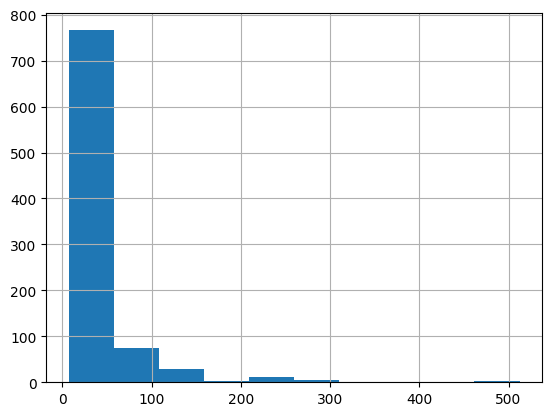

In [68]:
%matplotlib inline
(data['Fare']).hist()

In [69]:
import numpy as np

<Axes: >

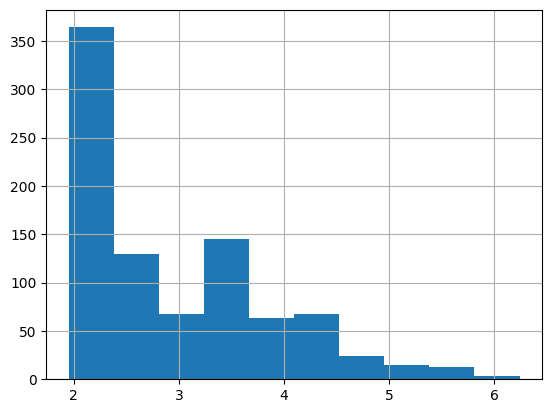

In [70]:
(np.log(data['Fare'])).hist()